# Анализ гипотез для увеличения выручки

Целью данного проекта является приоритизация гипотез, потенциально способствующих увеличению выручки интернет-магазина и изучение полученных результатов после проведения A/B тестов.

План проекта:  
1. Изучить и приоритизировать гипотезы с применением фреймворков ICE и RICE.  
2. Изучить результаты A/B теста.  
3. Сделать выводы.

# Оглавление

1. [Приоритизируем гипотезы](#1step)  
   1.1. [Приоритизация при помощи фреймворка ICE](#1.1step)  
   1.2. [Приоритизация при помощи фреймворка RICE](#1.2step)  
   1.3. [Сравним два фреймворка: ICE и RICE](#1.3step)  
2. [Проанализируем результаты A/B - теста](#2step)  
   2.1. [Обзор данных](#2.1step)  
   2.2. [Анализ выручки и среднего чека по группам](#2.2step)  
   2.3. [Анализ конверсии по группам](#2.3step)  
   2.4. [Анализ количества и стоимости заказов](#2.4step)  
   2.5. [Проверка различий между группами по "сырым" данным](#2.5step)  
   2.6. [Проверка различий между группами по "очищенным" данным](#2.6step)  
   2.7. [Общие выводы по результатам теста](#2.7step)  

Предварительно загружаем все библиотеки, которые понадобятся для последующего анализа:

In [1]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np

from scipy import stats as st

#библиотеки для визулизации
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as plticker
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt

pd.options.display.max_colwidth = 150

## Шаг 1. Приоритизируем гипотезы.  <a name="1step"></a>

Загружаем данные из источника:

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Названия столбцов начинаются с большой буквы, лучше будет заменить на названия с маленькой буквы, это сделает работу удобнее:

In [4]:
def change_col_names(data):
    data.columns = data.columns.str.lower()

In [5]:
change_col_names(hypothesis)

### 1.1. Приоритизация при помощи фреймворка ICE.  <a name="1.1step"></a>

Метод ICE используется для определения приоритетов. Приоритезация задач/гипотез крайне важна, особенно в условиях ограниченных трудовых ресурсов, времени и бюджетов.

Оценка ICE складывается из трех составляющих: Impact, Confidence и Ease и рассчитывается по следующей формуле:  

**ICE score** = Impact * Confidence * Ease *или*  
**ICE score** = (Impact * Confidence) / Efforts

**Impact** (влияние) - насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта.  
**Confidence** (уверенность) - насколько вы уверены, что это изменение повлияет на пользователей именно так.  
**Ease** (легкость) или **Efforts** (усилия) - это о простоте реализации. Это оценка того, сколько усилий и ресурсов требуется для реализации этой идеи.



Посчитаем оценку ICE для каждой гипотезы:

In [6]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']

In [7]:
hypothesis['ice'] = hypothesis['ice'].astype('int')

In [8]:
hypothesis_ice = hypothesis.sort_values(by='ice',ascending=False)

In [9]:
hypothesis_ice[['hypothesis','ice']]

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


Итак, согласно фреймворку ICE самой приоритетной гипотезой является гипотеза "Запустить акцию, дающую скидку на товар в день рождения". У этой гипотезы Impact и Confidence оценены практически максимально - на 9 баллов. Такая оценка понятна - скидка в день рождения совершенно точно повлияет на покупателя и сделает его более довольным. Усилия для реализации идеи оценены на 5 баллов - средняя оценка.

Следующая по убыванию гипотеза - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей". Влияние на пользователей было оценено на 10 баллов, но при этом уверенность в результате оценена в 9 баллов, а усилия - на 6, чуть выше, чем первая по приоритету гипотеза.

Третья гипотеза в топ-3 по приоритетам - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Данная гипотеза по усилиям и ресурсам, необходмым для ее реализации, также была оценена на 5 баллов, как и первая гипотеза. Но оценки влияния и уверенности ниже - 7 и 8 баллов, соответственно.

### 1.2. Приоритизация при помощи фреймворка RICE. <a name="1.2step"></a>

Метод RICE также используется для определения приоритетов. 

Главное отличие метода RICE от метода ICE в том, что метод RICE также учитывает охват.
Оценка RICE складывается из четырёх составляющих: Reach, Impact, Confidence и Ease и рассчитывается по следующей формуле:

**RICE score** = Reach * Impact * Confidence * Ease *или*  
**RICE score** = (Reach * Impact * Confidence) / Efforts

**Reach** (охват) - скольких пользователей затронет изменение

Посчитаем оценку RICE для каждой гипотезы:

In [10]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'])/hypothesis['efforts']

In [11]:
hypothesis['rice'] = hypothesis['rice'].astype('int')

In [12]:
hypothesis_rice = hypothesis.sort_values(by='rice',ascending=False)

In [13]:
hypothesis_rice[['hypothesis','rice']]

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Согласно фреймворку RICE самой приоритетной будет гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". Охват у данной гипотезы получил максимальную оценку - 10, т.е. реализация данной идеи повлияет на всех пользователей. Действительно, все пользователи так или иначе попадают на основные страницы и на каждой странице каждый пользователь увидит форму подписки.

Следующей по приоритетности будет гипотеза "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". Эта задача потребует немного усилий и ресурсов у команды - оценка усилий равна 3 баллам. Охват и уверенность в результате у гипотезы также высокие - 8 и 7 баллов, соответственно. Однако оценка влияния изменений на пользователей равна всего 3 баллам. Вероятно у команды есть основания полагать, что рекомендации на сайте хоть и увидят почти все пользователи, но при этом только на небольшую долю из них это повлияет.

Третий приоритет принадлежит двум гипотезам: гипотезе "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей" и "Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию". Эти гипотезы значительно отличаются друг от друга: первая (новые каналы -> новые пользователи) требует больше усилий (6) и у нее достаточно небольшой охват (3), но при этом и высокую оценку влияния (10) и уверенности в результате (8). Вторая (баннеры -> рост конверсии) потребует примерно в 2 раза меньше усилий (3), имеет более высокий охват (5) и такую же уверенность в результате (8), но при этом влияние оценено в 3 балла. Если команде необходимо выбрать одну из гипотез для тестирования, то вероятно выбор должен быть сделан исходя из наличия у команды ресурсов.

### 1.3. Сравним два фреймворка: ICE и RICE. <a name="1.3step"></a>

In [14]:
hypothesis[['hypothesis','ice','rice']].sort_values(by='rice',ascending=False)

,hypothesis,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11,112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7,56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13,40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8,40
8,"Запустить акцию, дающую скидку на товар в день рождения",16,16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1,9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1,4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1,3


Фреймворки ICE и RICE отличаются всего одной составляющей их оценки, но даже одна составляющая может координально изменить приоритетность гипотез. Эта составляющая, Reach, показывает охват, скольких пользователей затронет изменение. 

Так, например, самая приоритетная по методу ICE гипотеза о запуске акции в виде скидки на день рождения, затронет только тех пользователей, кто указал дату рождения в своем профиле , зашел на сайт интернет-магазина в этот день и решил сделать заказ. Вероятно на основании имеющейся информации о пользователях интернет-магазина есть основания полагать, что доля таких пользователей будет крайне низкой. 

Идея о добавлении блока рекомендаций на сайт не попала в топ приоритетов по методу ICE, однако попала на второе место по методу RICE из-за охвата - по оценке команды значительная часть пользователей увидит данные блоки рекомендаций и прочитает их.

Самая приоритетная по методу RICE гипотеза о добавлении формы подписки на все основные страницы затронет каждого пользователя - за счет этого эта гипотеза на первом месте по приоритетам. 

Выбор между двумя методами должен быть сделан командой исходя из того, является ли в тот или иной момент охват важной составляющей. 

## Шаг 2. Проанализируем результаты A/B - теста. <a name="2step"></a>

### 2.1. Обзор данных. <a name="2.1step"></a>

Прежде чем перейти к анализу, загрузим все необходимые данные и сделаем краткий обзор данных:

In [15]:
orders = pd.read_csv('/datasets/orders.csv')

In [16]:
visitors = pd.read_csv('/datasets/visitors.csv')

In [17]:
for data in [visitors,orders]:
    display(data.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [18]:
for data in [visitors,orders]:
    display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Можно заметить, что столбцы, содержащие информцию о дате, имеют тип данных object. Заменим тип данных на формат даты и времени в датасетах.

In [19]:
#функция для изменения формата даты и времени
def date_type(df):
    for column in df.columns:
        if 'date' in column:
            df[column] = df[column].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [20]:
date_type(visitors)
date_type(orders)

Посмотрим, за какой промежуток у нас имеется информация о посещениях и о покупках:

In [21]:
visitors['date'].agg({'min','max'})

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]

In [22]:
orders['date'].agg({'min','max'})

min   2019-08-01
max   2019-08-31
Name: date, dtype: datetime64[ns]

В нашем распоряжении имеется 2 датасета, которые содержат следующую информацию:  

1. **Visitors**  
Содержит информацию о посещениях сайта интернет-магазина за август 2019 года. Каждая строка представляет собой сгруппированную информацию по одному дню. 
    
    
2. **Orders**  
Содержит информацию о заказах, размещенных за исследуемый период - август 2019 года. В отличие от датасета Visitors данные в таблице Orders не сгруппированы, каждая строка представляет собой отдельный заказ, совершенный определенным пользователем из определенной группы A/B теста. Всего за 1 месяц было совершено 1197 заказов. 

Итак, мы провели A/B-тестирование, у нас есть вся необходимая информация для анализа результатов. Но прежде чем перейдем к анализу, соберем немного больше информации в разрезе групп A и B:

In [23]:
visitors_A_total = visitors.query('group == "A"')['visitors'].sum()
visitors_B_total = visitors.query('group == "B"')['visitors'].sum()
print('Количество посетителей интернет-магазина из группы A за август 2019 составило: {} человек'.format(visitors_A_total))
print('Количество посетителей интернет-магазина из группы B за август 2019 составило: {} человек'.format(visitors_B_total))
print('Разница в количестве посетителей составила {:.2%}'.format((visitors_B_total/visitors_A_total)-1))

Количество посетителей интернет-магазина из группы A за август 2019 составило: 18736 человек
Количество посетителей интернет-магазина из группы B за август 2019 составило: 18916 человек
Разница в количестве посетителей составила 0.96%


In [24]:
orders_A_total = orders.query('group == "A"')['transactionId'].nunique()
orders_B_total = orders.query('group == "B"')['transactionId'].nunique()
print('Количество заказов покупателями из группы A за август 2019 составило: {} заказов'.format(orders_A_total))
print('Количество заказов покупателями из группы B за август 2019 составило: {} заказов'.format(orders_B_total))
print('Разница в количестве заказов составила {:.2%}'.format((orders_B_total/orders_A_total)-1))

Количество заказов покупателями из группы A за август 2019 составило: 557 заказов
Количество заказов покупателями из группы B за август 2019 составило: 640 заказов
Разница в количестве заказов составила 14.90%


Итак, в августе 2019 года количество посетителей интернет-магазина из группы B превышало количество посетителей из группы A на 1%. При этом количество заказов, сделанных покупателями из группы B составило 640 заказов, что на 15% больше, чем количество заказов покупателями из группы A.

Проверим, не попал ли один и тот же пользователь в разные группы тестирования:

In [25]:
users_by_group = orders.groupby('visitorId').agg({'group':'nunique','transactionId':'nunique'})
multiple_group_users = users_by_group.query('group > 1')
print('Количество пользователей, попавших в две группы: ',multiple_group_users.shape[0])
print('Доля таких пользователей: {:.2%}'.format(multiple_group_users.shape[0]/users_by_group.shape[0]))

Количество пользователей, попавших в две группы:  58
Доля таких пользователей: 5.63%


In [26]:
print('Количество заказов, сделанных пользователями из разных групп:',multiple_group_users['transactionId'].sum())
print('Доля таких заказов: {:.2%}'.format(multiple_group_users['transactionId'].sum()/orders['transactionId'].nunique()))

Количество заказов, сделанных пользователями из разных групп: 181
Доля таких заказов: 15.12%


In [27]:
multiple_group_users.sort_values(by = 'transactionId',ascending=False).head(15)

,group,transactionId
visitorId,,
4256040402,2,11
2458001652,2,11
2378935119,2,9
2038680547,2,8
1230306981,2,5
237748145,2,5
3062433592,2,5
199603092,2,5
3717692402,2,5


58 пользователей (заказы этих пользователей) попало одновременно и в группу A, и в группу B. У нас нет возможности проверить посещения, возможно в посещениях также есть подобные пользователи, попавшие в две группы. 

Всего эти пользователи сделали 181 заказ, что составляет 15%. При этом мы видим, что некоторые пользователи сделали 8,9,11 заказов за месяц. 

In [28]:
orders_for_multiplegroup_users = orders[orders['visitorId']\
                                        .isin(multiple_group_users.index)]\
                                        .sort_values(by=['visitorId','date'])
orders_for_multiplegroup_users.head()

,transactionId,visitorId,date,revenue,group
71,3679129301,8300375,2019-08-01,10510,B
703,4293855558,8300375,2019-08-07,1790,A
246,437656952,199603092,2019-08-02,3488,B
1102,1941707234,199603092,2019-08-12,6438,A
26,2223239646,199603092,2019-08-15,3488,A


In [29]:
orders_for_multiplegroup_users.groupby('group').agg({'transactionId':'nunique'})

,transactionId
group,
A,89
B,92


Заказы распределились по группам практически в одинаковом количестве. Посмотрим, как отличается выручка по таким заказам:

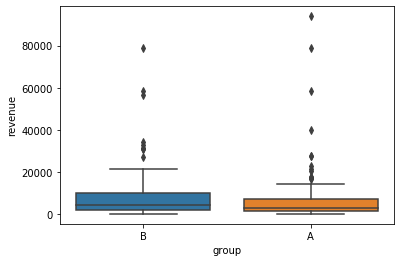

In [30]:
sns.boxplot(data=orders_for_multiplegroup_users,x='group',y='revenue');

У заказов, попавших в группу A больше выбросов, но при этом ниже медиана. У заказов из группы B выбросов на первый взгляд меньше, но медиана выше, чем у группы A. 

Для корректности анализа результатов A/B-теста правильнее было бы не брать в анализ пользователей, которые не провели весь тест в одной группе, т.к. это может исказить результаты. Однако конкретно в данном примере есть несколько причин из-за которых было принято решение оставить данных пользователей для анализа:

1) У нас нет информации о том, как было осуществлено разделение пользователей на группы. Возможно у того факта, что один пользователь попал в две группы есть объяснение, связанное с тем, как осуществлялось разделение. Это объяснение поможет нам решить, как поступить с этими пользователями.  
2) Данные о посещениях представлены в агрегированном виде, то есть мы не можем удалить посещения этих пользователей, т.к. не сможем узнать, когда точно они были и сколько их было и также мы не можем проверить, нет ли в посещениях других пользователей, попавших в две группы.

Поэтому продолжим дальнейший анализ с этими пользователями.

### 2.2. Анализ выручки и среднего чека по группам. <a name="2.2step"></a>

Задачи: 

1. Построить график кумулятивной выручки по группам.
2. Построить график кумулятивного среднего чека по группам.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. 
4. Сделать выводы и предположения на основании построенных графиков.

Для построения графиков нам необходимо собрать в единой таблице информацию о дате, группе, куммулятивной выручке и куммулятивном среднем чеке.

In [31]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [32]:
ordersAggregated = (datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])]
                    .agg({'date':'max','group':'max','transactionId':'nunique','visitorId':'nunique','revenue':'sum'}),
                           axis=1
                        )
                   )
ordersAggregated.columns = ['date','group','n_orders','n_byuers','revenue']

In [33]:
ordersAggregated['revenue_per_order'] = ordersAggregated['revenue']/ordersAggregated['n_orders']

In [34]:
ordersAggregated.head()

,date,group,n_orders,n_byuers,revenue,revenue_per_order
0,2019-08-15,B,339,317,2367945,6985.088496
2,2019-08-15,A,283,259,1979057,6993.134276
45,2019-08-16,A,301,277,2078908,6906.671096
47,2019-08-16,B,359,336,2539635,7074.192201
55,2019-08-01,A,24,20,148579,6190.791667


In [35]:
cummulativeRevenueA = ordersAggregated.query('group == "A"')[['date','revenue','revenue_per_order']].sort_values(by='date')
cummulativeRevenueB = ordersAggregated.query('group == "B"')[['date','revenue','revenue_per_order']].sort_values(by='date')

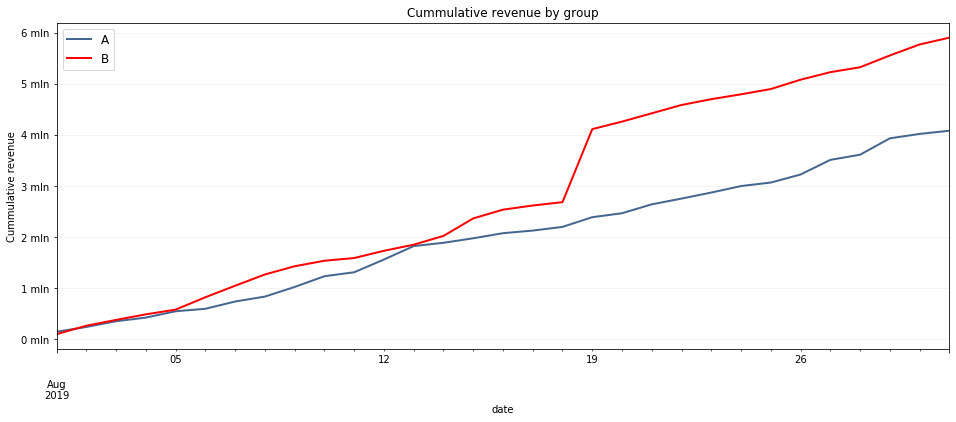

In [36]:
ax = cummulativeRevenueA.plot(x='date',y='revenue',label='A',linewidth=2,color='#45678f',figsize=(16,6))
cummulativeRevenueB.plot(x='date',y='revenue',label='B',linewidth=2,color='r',ax=ax,figsize=(16,6));
plt.legend(fontsize=12);
plt.title('Cummulative revenue by group');
plt.ylabel('Cummulative revenue');
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: '{:.0f} mln'.format(y/1000000)));
ax.grid(True, color='#e2e2e2', alpha=0.5);

Накопленная за первые 5 дней теста выручка по обеим группам практически одинаковая. В течение последующих 8 дней мы видим, что сначала темпы роста выручки у группы B выросли по сравнению с группой A, но затем упали и к 12 дню вновь накопленная выручка оказалась одинаковой. На 19 день теста мы видим резкий скачок выручки у группы B - он выглядит подозрительным, поскольку до этого выручка росла более гладко. После этого резкого скачка темпы роста выручки у группы B вновь стабилизировались.
При этом выручка у группы A росла более равномерно на протяжении всего периода.

Вероятнее всего резкий скачок у группы B объясняется выбросами - разовыми дорогими заказами или заказами по обычной цене, но в аномально большом количестве. Без таких аномальных выбросов есть предположение, что накопленная выручка у группы B могла быть равна выручке группы A или же отличалась от нее, но незначительно (в большую или меньшую сторону). Впоследствии вернемся к этому моменту.

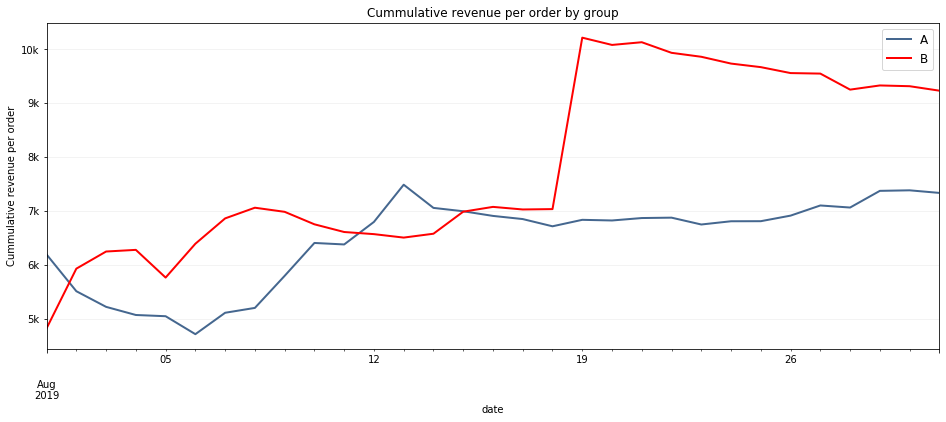

In [37]:
ax = cummulativeRevenueA.plot(x='date',y='revenue_per_order',label='A',linewidth=2,color='#45678f',figsize=(16,6))
cummulativeRevenueB.plot(x='date',y='revenue_per_order',label='B',linewidth=2,color='r',ax=ax,figsize=(16,6));
plt.legend(fontsize=12);
plt.title('Cummulative revenue per order by group');
plt.ylabel('Cummulative revenue per order');
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: '{:.0f}k'.format(y/1000)));
ax.grid(True, color='#e2e2e2', alpha=0.5);

Средний чек в первой половине теста выглядит неравномерным для обоих групп. Для группы A средний чек сокращался в первые 6 дней, затем к 13 дню значительно увеличился и затем чем ближе к концу периода, тем больше равномерным становится средний чек.

В группе B мы видим резкий скачок среднего чека на 19 день теста, мы видели его уже ранее на графике накопленной выручки. Вероятно в этот день были совершены аномально дорогие заказы, которые привели к такому резкому изменению среднего чека. После 19 дня до конца периода мы видим, что средний чек сокращается, но о стабилизации пока речи не идет.

In [38]:
cummulativeRevenueMerged = (cummulativeRevenueA[['date','revenue_per_order']]
                            .merge(cummulativeRevenueB[['date','revenue_per_order']],on='date',suffixes=['A', 'B'])
                           )
cummulativeRevenueMerged['relative_diff'] = \
                        (cummulativeRevenueMerged['revenue_per_orderB']/cummulativeRevenueMerged['revenue_per_orderA']) - 1

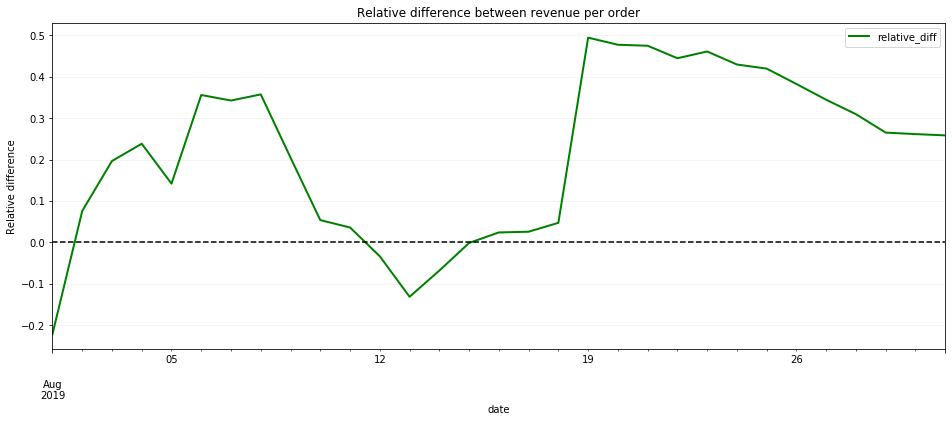

In [39]:
ax = cummulativeRevenueMerged.plot(x='date',y='relative_diff',linewidth=2,color='green',figsize=(16,6));
plt.title('Relative difference between revenue per order');
plt.ylabel('Relative difference');
ax.grid(True, color='#e2e2e2', alpha=0.5);
plt.axhline(y=0, color='black', linestyle='--');

График относительного изменения кумулятивного среднего чека группы B к группе A выглядит неравномерным из-за наличия резких скачков. Вероятнее всего эти скачки связаны с наличием выбросов в данных.

### 2.3. Анализ конверсии по группам. <a name="2.3step"></a>

Задачи: 

1. Построить график кумулятивной конверсии по группам.
2. Построить график относительного изменения кумулятивной конверсии группы B к группе A.
3. Сделать выводы и предположения на основании построенных графиков.

In [40]:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date']<=x['date'],visitors['group'] == x['group'])]
                      .agg({'date':'max','group':'max','visitors':'sum'}),
                        axis=1)
                     )
visitorsAggregated.head()

,date,group,visitors
0,2019-08-15,B,9600
2,2019-08-15,A,9686
45,2019-08-16,A,10047
47,2019-08-16,B,10013
55,2019-08-01,A,719


In [41]:
conversionData = ordersAggregated[['date','group','n_orders']].merge(visitorsAggregated, on=['date','group'])

In [42]:
conversionData['conversion'] = conversionData['n_orders']/conversionData['visitors']
conversionData.head()

,date,group,n_orders,visitors,conversion
0,2019-08-15,B,339,9600,0.035312
1,2019-08-15,A,283,9686,0.029217
2,2019-08-16,A,301,10047,0.029959
3,2019-08-16,B,359,10013,0.035853
4,2019-08-01,A,24,719,0.033380


In [43]:
conversionDataA = conversionData.query('group == "A"')[['date','conversion']].sort_values(by='date')
conversionDataB = conversionData.query('group == "B"')[['date','conversion']].sort_values(by='date')

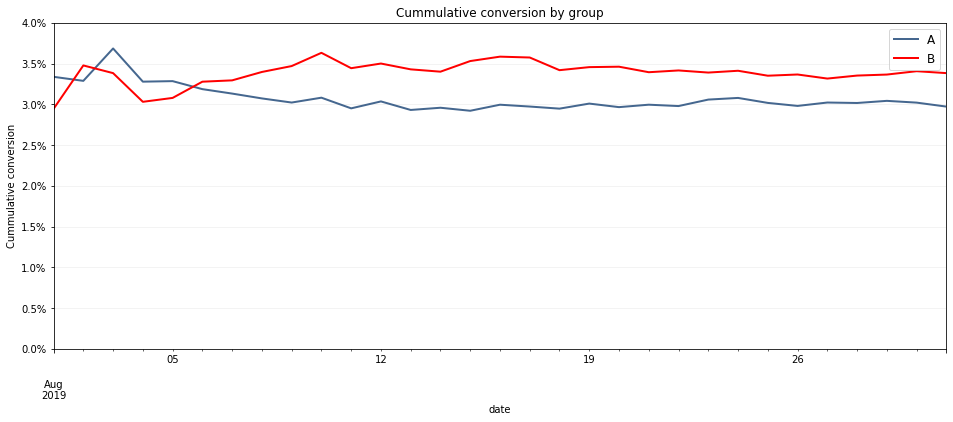

In [44]:
ax = conversionDataA.plot(x='date',y='conversion',label='A',linewidth=2,color='#45678f',figsize=(16,6))
conversionDataB.plot(x='date',y='conversion',label='B',linewidth=2,color='r',ax=ax,figsize=(16,6));
plt.legend(fontsize=12);
plt.title('Cummulative conversion by group');
plt.ylabel('Cummulative conversion');
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, p: '{:.1%}'.format(y)));
ax.grid(True, color='#e2e2e2', alpha=0.5);
ax.set_ylim(0,0.04);

График конверсий выглядит более равномерным, по сравнению с графиками выручки и среднего чека. Приблизительно в первой трети периода мы видим колебания в конверсии обеих групп, в течение нескольких дней конверсия группы A превышала конверсию группы B. Однако приблизительно с 10-11 дня теста ситуация стабилизировалась: конверсия группы B стала выше конверсии группы A и ситуация сохранилась до конца периода.

In [45]:
conversionDataMerged = conversionDataA.merge(conversionDataB,on='date',suffixes=['A', 'B'])
conversionDataMerged['relative_diff'] = (conversionDataMerged['conversionB']/conversionDataMerged['conversionA'])-1

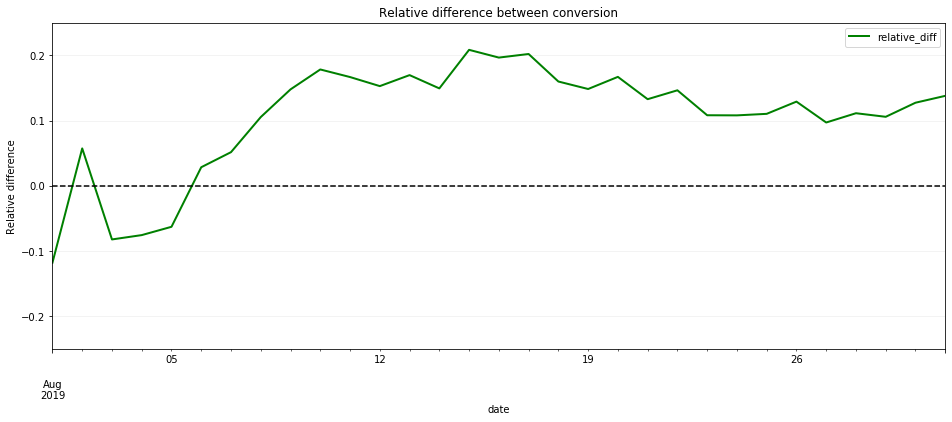

In [46]:
ax = conversionDataMerged.plot(x='date',y='relative_diff',linewidth=2,color='green',figsize=(16,6));
plt.title('Relative difference between conversion');
plt.ylabel('Relative difference');
ax.grid(True, color='#e2e2e2', alpha=0.5);
plt.axhline(y=0, color='black', linestyle='--');
ax.set_ylim(-0.25,0.25);

На графике относительного изменения кумулятивной конверсии группы B к группе A мы видим всплески, однако мы не видим тенденции к сокращению разницы или ее росту. Несмотря на скачки разница в конверсии между группами сохраняется, скачки же возможно объясняются аномально большими заказами. 

### 2.4. Анализ количества и стоимости заказов.  <a name="2.4step"></a>

Задачи: 

1. Построить точечный график количества заказов по пользователям.
2. Построить точечный график стоимостей заказов.
3. Сделать выводы и предположения на основании построенных графиков.
4. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
5. Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.

In [47]:
orders_by_users = (orders
                       .groupby(['visitorId'],as_index=False)
                       .agg({'transactionId':'nunique'})
                  )
orders_by_users.columns = ['user','n_orders']

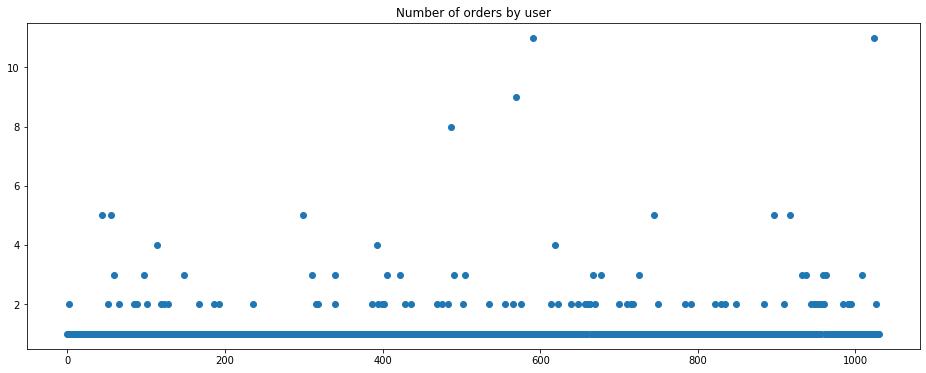

In [48]:
plt.figure(figsize=(16,6));
plt.scatter(x=pd.Series(range(0,len(orders_by_users))),y=orders_by_users['n_orders']);
plt.title('Number of orders by user');

Согласно графику, основная часть пользователей оформила только 1 заказ за весь период. При этом мы видим, что есть такие пользователи, которые сделали и 5, и 9, и 11 заказов. Таких пользователей крайне мало, посчитаем 95 и 99-й перцентили, чтобы убедиться в этом:

In [49]:
print('Не более 5% пользователей оформляли больше {:.0f} заказов'.format(np.percentile(orders_by_users['n_orders'],95)))
print('Не более 1% пользователей оформляли больше {:.0f} заказов'.format(np.percentile(orders_by_users['n_orders'],99)))

Не более 5% пользователей оформляли больше 2 заказов
Не более 1% пользователей оформляли больше 4 заказов


In [50]:
print('Количество пользователей, оформивших 3 заказа: {:.2%}'\
      .format(len(orders_by_users.query('n_orders == 3'))/len(orders_by_users)))

Количество пользователей, оформивших 3 заказа: 1.65%


In [51]:
print('Количество пользователей, оформивших 4 заказа: {:.2%}'\
      .format(len(orders_by_users.query('n_orders == 4'))/len(orders_by_users)))


Количество пользователей, оформивших 4 заказа: 0.29%


Согласно найденным 95-м и 99-м перцентилям количества заказов на одного пользователя, не более 5% пользователей сделали больше 2х заказов и не более 1% более 4 заказов. 

**Примем за аномальных пользователей тех, кто совершил более чем 3 заказов**. Не будем включать пользователей с 4 заказами в анализ, поскольку их доля составляет всего 0.64%. Даже пользователи с 2 заказами не совсем частая история, таких пользователей всего 4%, по сравнению с 94% пользователей с 1 заказом. Пользователи с 3 заказами составляют чуть более 1%.

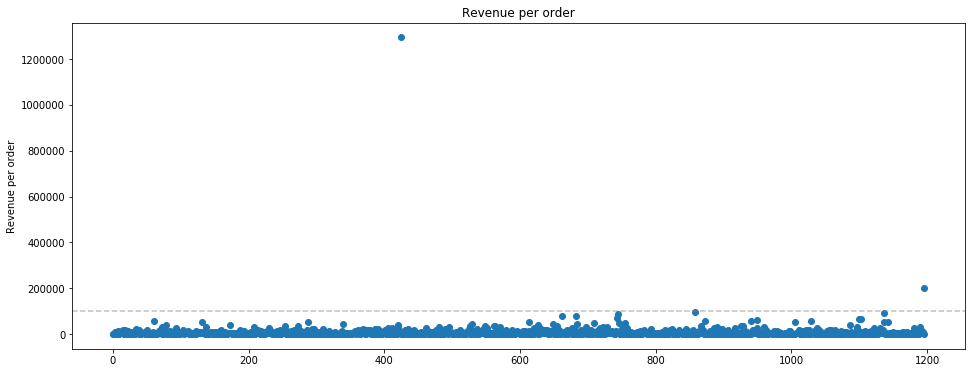

In [52]:
plt.figure(figsize=(16,6));
plt.scatter(x=pd.Series(range(0,len(orders))),y=orders['revenue']);
plt.title('Revenue per order');
plt.ylabel('Revenue per order');
plt.axhline(y=100000, color='grey', linestyle='--', alpha=0.5);

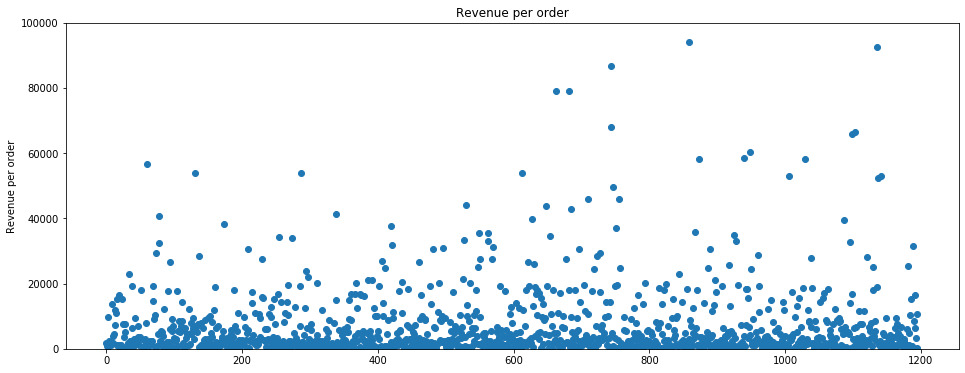

In [53]:
plt.figure(figsize=(16,6));
plt.scatter(x=pd.Series(range(0,len(orders))),y=orders['revenue']);
plt.title('Revenue per order');
plt.ylabel('Revenue per order');
plt.ylim(0,100000);

На первом графике мы видим, что практически все заказы лежат в области до 100 тыс. (серая линия). Поэтому построили дополнительный график с ограничением по оси y. На нем мы можем заметить, что основная часть заказов лежит в области до 10 тыс рублей. От 10 тыс. до 20 тыс. заказы также не редки, хоть их количество и меньше, чем до 10 тыс. Но мы видим, что есть заказы и за 80 тыс. - 100 тыс. рублей, которые скорее аномальные для нашего интернет-магазина. Посчитаем 95 и 99-й перцентили:

In [54]:
print('Не более 5% заказов дороже {:.0f} рублей'.format(np.percentile(orders['revenue'],95)))
print('Не более 1% заказов дороже {:.0f} рублей'.format(np.percentile(orders['revenue'],99)))

Не более 5% заказов дороже 28000 рублей
Не более 1% заказов дороже 58233 рублей


In [55]:
print('Количество покупателей со средним чеком за одну покупку более 40 тыс. рублей: {:.1%}'.\
      format(len(orders.query('revenue > 40000'))/len(orders)))

Количество покупателей со средним чеком за одну покупку более 40 тыс. рублей: 2.4%


Согласно найденным 95-м и 99-м перцентилям средних чеков, не более 5% пользователей сделали заказы дороже 28 тыс. рублей и не более 1% дороже 58 тыс. руб.

**Примем за аномальных пользователей тех, чей средний чек за одну покупку составил более 40 000 рублей**. Доля таких пользователей составляет 2.4%.

### 2.5. Проверка различий между группами по "сырым" данным.  <a name="2.5step"></a>

Задачи: 

1. Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным.
2. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
3. Сделать выводы и предположения на основании полученных результатов.

In [56]:
orders_by_users_and_groups = (orders
                       .groupby(['visitorId','group'],as_index=False)
                       .agg({'transactionId':'nunique'})
                  )
orders_by_users_and_groups.columns = ['user','group','n_orders']

In [57]:
orders_by_usersA = orders_by_users_and_groups.query('group == "A"')
orders_by_usersB = orders_by_users_and_groups.query('group == "B"')

In [58]:
print('Количество покупателей из группы A за август 2019 составило: {} человек'.format(len(orders_by_usersA)))
print('Количество покупателей из группы B за август 2019 составило: {} человек'.format(len(orders_by_usersB)))

Количество покупателей из группы A за август 2019 составило: 503 человек
Количество покупателей из группы B за август 2019 составило: 586 человек


In [59]:
zero_ordersA = pd.Series(0, index=np.arange(visitors_A_total - len(orders_by_usersA['n_orders'])), name='orders')
zero_ordersB = pd.Series(0, index=np.arange(visitors_B_total - len(orders_by_usersB['n_orders'])), name='orders')

In [60]:
sampleA = pd.concat([orders_by_usersA['n_orders'],zero_ordersA],axis=0)
sampleB = pd.concat([orders_by_usersB['n_orders'],zero_ordersB],axis=0)

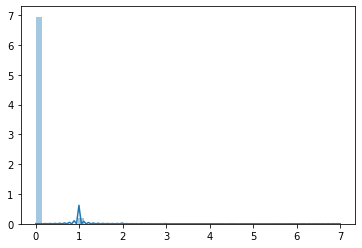

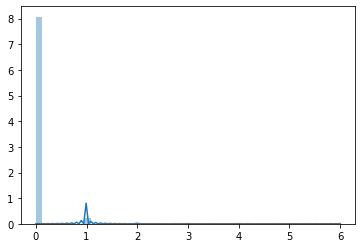

In [61]:
for data in [sampleA,sampleB]:
    sns.distplot(data);
    plt.show();

Графики распределений однозначно говорят о том, что распределение не является нормальным, поэтому мы воспользуемся тестом Манна-Уитни для сравнения двух выборок.

Сформулируем гипотезы:

**H₀**: конверсии в группах A и B равны  
**H₁**: конверсии в группах A и B не равны

Проверять гипотезы будем при уровне значимости равном 5%.

In [62]:
alpha = .05
results_conversion = st.mannwhitneyu(sampleA, sampleB)[1]
print("p-значение: {0:.3f}".format(results_conversion))

if (results_conversion < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница между конверсией в группе B и в группе A равна {:.2%}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.008
Отвергаем нулевую гипотезу
Относительная разница между конверсией в группе B и в группе A равна 13.81%


Относительная разница между конверсией в группе B и в группе A составляет почти 14%  и согласно тесту она является значимой. Мы можем отвергнуть нулевую гипотезу о равенстве конверсии в двух группах на основании "сырых" данных.

In [63]:
revenue_sampleA = orders.query('group == "A"')['revenue']
revenue_sampleB = orders.query('group == "B"')['revenue']

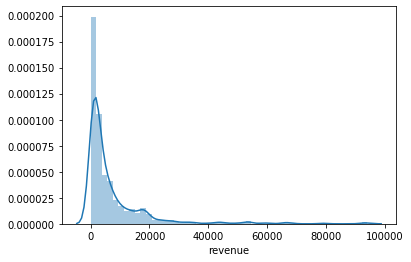

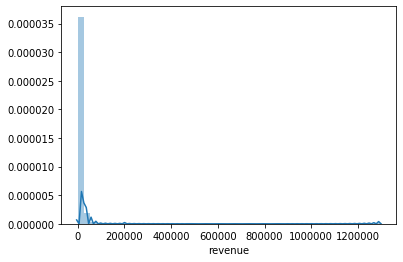

In [64]:
for data in [revenue_sampleA,revenue_sampleB]:
    sns.distplot(data);
    plt.show();

Распределение выручки также не выглядит нормальным. Убедимся в этом при помощи критерия Шапиро-Уилка:

In [65]:
alpha = .05
results = st.shapiro(revenue_sampleA)
p_value = results[1]

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

p-значение:  1.739703399801917e-34
Отвергаем нулевую гипотезу: распределение не нормально


In [66]:
alpha = .05
results = st.shapiro(revenue_sampleB)
p_value = results[1]

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Итак, распределение не является нормальным, поэтому мы воспользуемся тестом Манна-Уитни для сравнения двух выборок.

Сформулируем гипотезы:

**H₀**: различий между средний чеком в группах A и B нет  
**H₁**: различия между средний чеком в группах A и B имеются   

Проверять гипотезы будем при уровне значимости равном 5%.

In [67]:
alpha = .05
results_revenue = st.mannwhitneyu(revenue_sampleA, revenue_sampleB)[1]
print("p-значение: {0:.3f}".format(results_revenue))

if (results_revenue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница между средним чеком в группе B и в группе A равна {:.2%}".format(revenue_sampleB.mean()/revenue_sampleA.mean()-1))

p-значение: 0.365
Не получилось отвергнуть нулевую гипотезу
Относительная разница между средним чеком в группе B и в группе A равна 25.87%


Несмотря на то, что относительная разница между средними чеками составила почти 26%, тем не менее мы не можем отвергнуть нулевую гипотезу о том, что различий между средним чеков в разных группах нет. Вероятно это связано с выбросами в данных.

Проверим, какие будут результаты после исключения из анализа аномальных пользователей.

### 2.6. Проверка различий между группами по "очищенным" данным.  <a name="2.6step"></a>

Задачи: 

1. Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным.
2. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
3. Сделать выводы и предположения на основании полученных результатов.

In [68]:
abnormal_orders = orders_by_users.query('n_orders > 3')['user']
abnormal_revenue = orders.query('revenue > 40000')['visitorId']
abnormal_users = pd.concat([abnormal_orders,abnormal_revenue],axis=0).drop_duplicates()
abnormal_users.shape

(38,)

In [69]:
print('Доля аномальных пользователей составляет: {:.2%}'.format(len(abnormal_users)/len(orders_by_users['user'])))

Доля аномальных пользователей составляет: 3.69%


Итак, всего аномальных пользователей, сделавших более 3-х заказов и/или сделавших заказы дороже 40 тыс. рублей, 34 человека, что составляет 3% от всего количества пользователей. Отфильтруем наши выборки и проверим гипотезы. Проверять будем при помощи теста Манна-Уитни.

In [70]:
sampleAFiltered = pd.concat([orders_by_usersA.query('user not in @abnormal_users')['n_orders'],
                             zero_ordersA],axis=0)
sampleBFiltered = pd.concat([orders_by_usersB.query('user not in @abnormal_users')['n_orders'],
                             zero_ordersB],axis=0)

Проверим гипотезу о равенстве конверсии в двух группах:

**H₀**: конверсии в группах A и B равны  
**H₁**: конверсии в группах A и B не равны

Проверять гипотезы будем при уровне значимости равном 5%.

In [71]:
alpha = .05
results_conversion_filtered = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-значение: {0:.3f}".format(results_conversion_filtered))

if (results_conversion_filtered < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница между конверсией в группе B и в группе A равна {:.2%}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.005
Отвергаем нулевую гипотезу
Относительная разница между конверсией в группе B и в группе A равна 16.45%


Мы по прежнему отвергаем нулевую гипотезу о равенстве конверсий, но как мы видим, относительная разница между группами выросла с 13,8% до 16,4% после удаления аномальных пользователей из анализа.

In [72]:
revenue_sampleAFiltered = orders.query('visitorId not in @abnormal_users & group == "A"')['revenue']
revenue_sampleBFiltered = orders.query('visitorId not in @abnormal_users & group == "B"')['revenue']

Проверим гипотезу о равенстве среднего чека в разных группах:

**H₀**: различий между средний чеком в группах A и B нет  
**H₁**: различия между средний чеком в группах A и B имеются   

Проверять гипотезы будем при уровне значимости равном 5%.

In [73]:
alpha = .05
results_revenue_filtered = st.mannwhitneyu(revenue_sampleAFiltered, revenue_sampleBFiltered)[1]
print("p-значение: {0:.3f}".format(results_revenue_filtered))

if (results_revenue_filtered < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    
print("Относительная разница между средним чеком в группе B и в группе A равна {:.2%}".format(revenue_sampleBFiltered.mean()/revenue_sampleAFiltered.mean()-1))

p-значение: 0.421
Не получилось отвергнуть нулевую гипотезу
Относительная разница между средним чеком в группе B и в группе A равна 5.47%


Результат проверки гипотезы не изменился: мы не можем отвергнуть нулевую гипотезу о равенстве среднего чека, но при этом теперь мы видим совершенно иную относительную разницу между средним чеком групп 6%, против 26% разницы по данным с выбросами. 

Посмотрим, как выглядит график относительного различия между средним чеком группы B и группы A после удаления аномальных пользователей из анализа:

In [74]:
ordersAggregatedFiltered = (datesGroups
                    .apply(lambda x: orders.query('visitorId not in @abnormal_users')[np.logical_and(orders['date'] <= x['date'],orders['group'] == x['group'])]
                    .agg({'date':'max','group':'max','transactionId':'nunique','visitorId':'nunique','revenue':'sum'}),
                           axis=1
                        )
                   )
ordersAggregatedFiltered.columns = ['date','group','n_orders','n_byuers','revenue']

In [75]:
ordersAggregatedFiltered['revenue_per_order'] = ordersAggregatedFiltered['revenue']/ordersAggregatedFiltered['n_orders']

In [76]:
cummulativeRevenueA_filtered = ordersAggregatedFiltered.query('group == "A"')[['date','revenue','revenue_per_order']].sort_values(by='date')
cummulativeRevenueB_filtered = ordersAggregatedFiltered.query('group == "B"')[['date','revenue','revenue_per_order']].sort_values(by='date')

In [77]:
cummulativeRevenueMerged_filtered = (cummulativeRevenueA_filtered[['date','revenue_per_order']]
                            .merge(cummulativeRevenueB_filtered[['date','revenue_per_order']],on='date',suffixes=['A', 'B'])
                           )
cummulativeRevenueMerged_filtered['relative_diff'] = \
                        (cummulativeRevenueMerged_filtered['revenue_per_orderB']/cummulativeRevenueMerged_filtered['revenue_per_orderA']) - 1

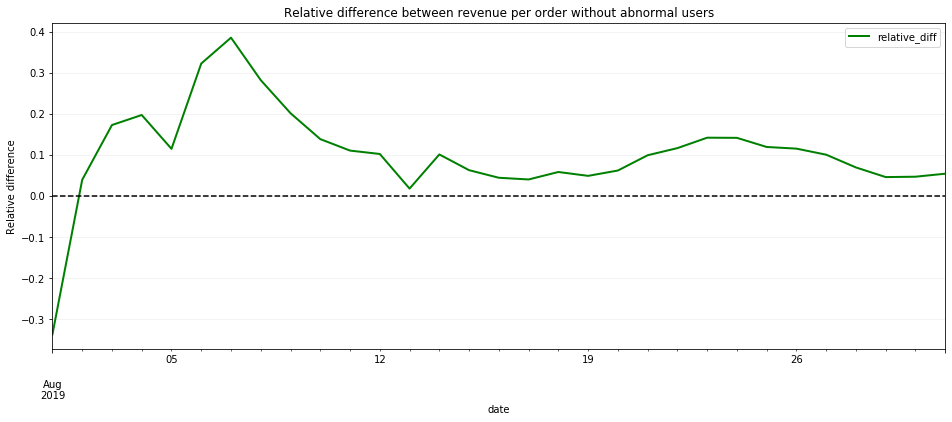

In [78]:
ax = cummulativeRevenueMerged_filtered.plot(x='date',y='relative_diff',linewidth=2,color='green',figsize=(16,6));
plt.title('Relative difference between revenue per order without abnormal users');
plt.ylabel('Relative difference');
ax.grid(True, color='#e2e2e2', alpha=0.5);
plt.axhline(y=0, color='black', linestyle='--');

### 2.7. Общие выводы по результатам теста.  <a name="2.7step"></a>

Задача: 

Принять решение по результатам теста и объяснить его.  Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Итак, нашей задачей было проанализировать результаты A/B теста и принять решение на основании полученных результатов.

За 1 месяц теста (август 2019 года) сайт нашего интернет-магазина посетили 37652 пользователя, из них 1031 пользователей сделали 1197 заказов. Пользователи были разделены на две группы A и B, мы изучили основные показатели этих групп за период и сделали следующие выводы:

**1)** Как по "сырым", так и по "очищенным" от аномальных пользователей данным существует статитистически значимые различия по конверсии между группами. Относительная разница в конверсии между группами составила 13,8% по "сырым" данным и 16,4% по "очищенным" данным. Конверсия по группе B действительно выше конверсии по группе A, даже после очистки от аномалий.

**2)** Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по "очищенным" от аномалий данным. При этом по "сырым" данным относительная разница между средним чеком составляла 26%, но не была статистически значимой. По "очищенным" от аномалий данным относительная разница составляет 6% и не является статистически значимой.

**3)** График конверсий по группам показывает, что результаты группы B лучше группы A и вероятнее всего стабилизировались и зафиксировались около среднего значения

**4)** График различия среднего чека по "сырым" данным не позволял сделать выводы, но график по "очищенным" данным также показывает, что основные колебания уже пройдены и средний чек начал стабилизироваться.

Исходя из перечисленных фактов решением будет остановить тест, зафиксировать победу группы B по конверсии и отсутствие значимых различий по среднему чеку. 